In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = h5py.File("data/train_catvnoncat.h5", "r")
test_data = h5py.File("data/test_catvnoncat.h5", "r")

In [3]:
print(train_data.keys())
print(test_data.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [4]:
def load_data():
    x_train = np.empty(train_data["train_set_x"].shape)
    y_train = np.empty(train_data["train_set_y"].shape)
    x_test = np.empty(test_data["test_set_x"].shape)
    y_test = np.empty(test_data["test_set_y"].shape)

    train_data["train_set_x"].read_direct(x_train)
    train_data["train_set_y"].read_direct(y_train)
    test_data["test_set_x"].read_direct(x_test)
    test_data["test_set_y"].read_direct(y_test)

    return (x_train, y_train, x_test, y_test)

In [5]:
x_train, y_train, x_test, y_test = load_data()

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print(" x_test:", x_test.shape)
print(" y_test:", y_test.shape)

x_train: (209, 64, 64, 3)
y_train: (209,)
 x_test: (50, 64, 64, 3)
 y_test: (50,)


nx = number of features <br>
m = number of samples

Currently, each input sample is an array of shape **64 x 64 x 3**. So we first flatten every sample. After this, `x_train` & `x_test` become matrices where each row is a sample vector. We then transpose them so that each column will represent an input sample.

Shape of `x_train` & `x_test` = `(nx, m)`

In [6]:
x_train = x_train.reshape(-1, 64 * 64 * 3).T / 255.0
y_train = y_train.reshape(1, -1)
x_test = x_test.reshape(-1, 64 * 64 * 3).T / 255.0
y_test = y_test.reshape(1, -1)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print(" x_test:", x_test.shape)
print(" y_test:", y_test.shape)

x_train: (12288, 209)
y_train: (1, 209)
 x_test: (12288, 50)
 y_test: (1, 50)


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

We will use a single neuron with sigmoid activation.

Shape of weights = `(nx, 1)` &nbsp;(a row vector)

Loss function - Binary Crossentropy: <br>
`L(y_pred, y) = -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))`

Cost: <br>
`J(y_pred, y) = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m`

In [8]:
def forward(w, b, x):
    y_pred = sigmoid(np.dot(w.T, x) + b)
    return y_pred

def backprop(x, y, y_pred):
    m = x.shape[1]  # number of samples

    cost = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / m
    dz = y_pred - y

    dw = np.dot(x, dz.T) / m
    db = np.sum(dz) / m

    gradients = {"dw": dw, "db": db}
    return (gradients, cost)

In [9]:
def optimize(w, b, x, y, epochs, lr=0.001, print_cost=False):
    costs = []
    for i in range(epochs):
        y_pred = forward(w, b, x)
        grads, cost = backprop(x, y, y_pred)

        dw = grads["dw"]
        db = grads["db"]

        w -= lr * dw
        b -= lr * db

        if i % 100 == 0:
            costs.append(cost)

            if print_cost:
                print(f"Epoch {i:4d}, Cost = {cost:.3f}")

    return costs

In [10]:
nx = x_train.shape[0]  # number of features
w = np.zeros((nx, 1))
b = np.array(0.0)

costs = optimize(w, b, x_train, y_train, epochs=2_000, lr=0.005, print_cost=True)

Epoch    0, Cost = 0.693
Epoch  100, Cost = 0.585
Epoch  200, Cost = 0.467
Epoch  300, Cost = 0.376
Epoch  400, Cost = 0.331
Epoch  500, Cost = 0.303
Epoch  600, Cost = 0.280
Epoch  700, Cost = 0.260
Epoch  800, Cost = 0.243
Epoch  900, Cost = 0.228
Epoch 1000, Cost = 0.215
Epoch 1100, Cost = 0.203
Epoch 1200, Cost = 0.193
Epoch 1300, Cost = 0.183
Epoch 1400, Cost = 0.174
Epoch 1500, Cost = 0.167
Epoch 1600, Cost = 0.159
Epoch 1700, Cost = 0.153
Epoch 1800, Cost = 0.147
Epoch 1900, Cost = 0.141


In [11]:
def binary_accuracy(y_pred, y):
    return np.mean((y_pred > 0.5) == y)

In [12]:
pred_train = forward(w, b, x_train)
pred_test = forward(w, b, x_test)

print("Training accuracy:", binary_accuracy(pred_train, y_train))
print("Test accuracy:", binary_accuracy(pred_test, y_test))

Training accuracy: 0.9904306220095693
Test accuracy: 0.7


In [13]:
def label(n):
    return "cat" if n > 0.5 else "non-cat"

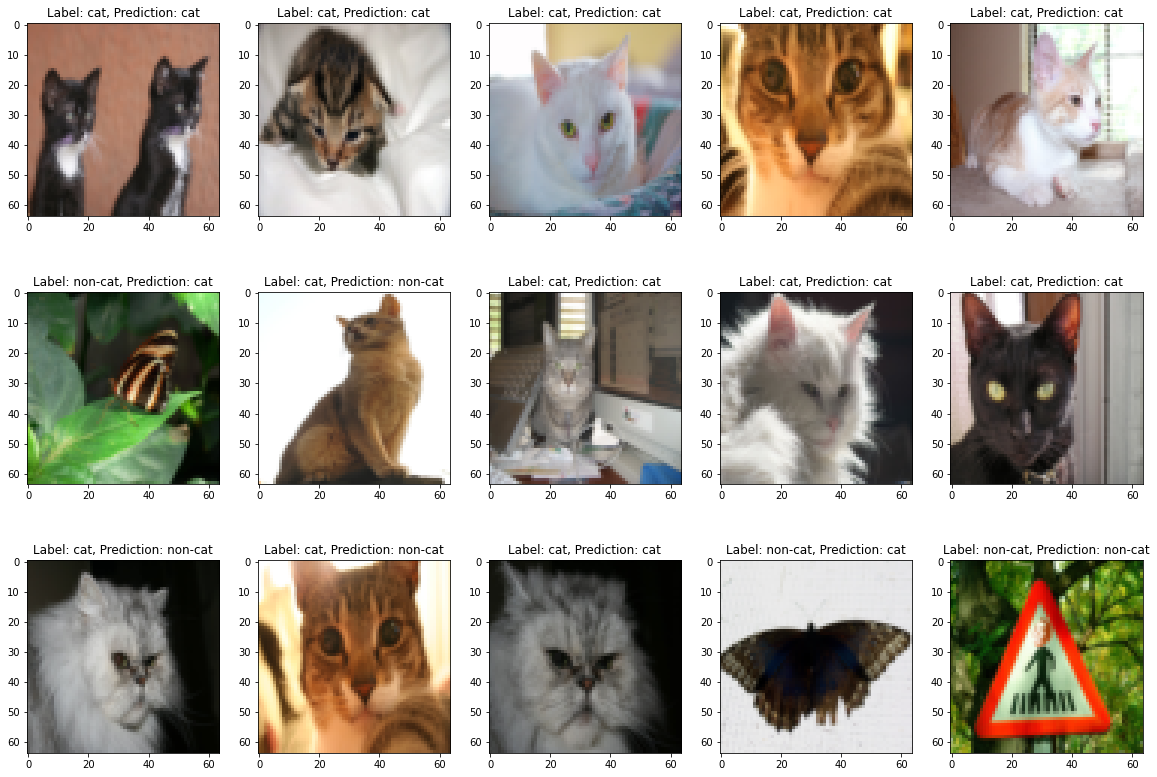

In [14]:
fig, axs = plt.subplots(3, 5, figsize=(20, 14))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(x_test[:, i].reshape(64, 64, 3))
    plt.title(f"Label: {label(y_test[0, i])}, Prediction: {label(pred_test[0, i])}")